In [1]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import seaborn as sns
env = gym.make('MountainCar-v0')
# env = gym.make('MountainCar-v0', render_mode="human")

In [2]:
testDyna = DynaAgent(env, discr_step=[0.025, 0.005])

-----------variables- new--------
number of positions = 72
number of velocity = 28
number of states = 2016
self.discretization_position = [-1.2   -1.175 -1.15  -1.125 -1.1   -1.075 -1.05  -1.025 -1.    -0.975
 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775 -0.75  -0.725
 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525 -0.5   -0.475
 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275 -0.25  -0.225
 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.     0.025
  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275
  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5    0.525
  0.55   0.575  0.6  ]
self.discretization_speed = [-0.07  -0.065 -0.06  -0.055 -0.05  -0.045 -0.04  -0.035 -0.03  -0.025
 -0.02  -0.015 -0.01  -0.005  0.     0.005  0.01   0.015  0.02   0.025
  0.03   0.035  0.04   0.045  0.05   0.055  0.06   0.065  0.07 ]
-----------------------------------------
------------------------------------------
We will log this exper

In [3]:
total_reward = testDyna.train(num_episodes=3000)

100%|██████████| 3000/3000 [07:11<00:00,  6.95it/s]


[Save Model] : Model was saved succesfully in discr_step=[0.025, 0.005]@discount_factor=0.99@20240602-123559 !


In [4]:
Q = testDyna.delta_q_update
discr_step = (0.1, 0.01)
position_bins = np.arange(-1.2, 0.6, discr_step[0])
velocity_bins = np.arange(-0.07, 0.0699, discr_step[1])
print(position_bins)
print(velocity_bins)

num_pos_bins = len(position_bins)
num_vel_bins = len(velocity_bins)

# Assume Q is a numpy array of shape (len(position_bins) + 1, len(velocity_bins) + 1, number_of_actions)
# Replace this with your actual Q-values array
# Q = np.load('path_to_your_Q_values.npy')  # Load your actual Q-values

# Example Q-values for illustration

max_Q_values = np.max(Q).reshape(num_pos_bins, num_vel_bins)

# Identify unvisited states (where all Q-values are zero)
unvisited_mask = np.all(Q == 0).reshape(num_pos_bins, num_vel_bins)

# Mask the max Q-values of unvisited states
masked_max_Q_values = np.ma.masked_where(unvisited_mask, max_Q_values)

# Create a meshgrid for the position and velocity bins
pos_grid, vel_grid = np.meshgrid(position_bins, velocity_bins, indexing='ij')

# # Plot the max Q-values
# plt.figure(figsize=(12, 6))
# contour = plt.contourf(pos_grid, vel_grid, masked_max_Q_values, cmap='plasma')  # Transpose to match the meshgrid orientation
# plt.colorbar(contour, label='Max Q-value')
# plt.xlabel('Position')
# plt.ylabel('Velocity')
# plt.title('Max Q-value for each state (Position, Velocity)')
# plt.show()

# Plot the max Q-values as a heatmap
plt.figure(figsize=(10, 8))
heatmap = plt.imshow(masked_max_Q_values.T, cmap='plasma', origin='lower', aspect='auto',
                     extent=[position_bins[0], position_bins[-1] + discr_step[0], velocity_bins[0], velocity_bins[-1] + discr_step[1]])
plt.colorbar(heatmap, label='Max Q-value')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title(f'Max Q-value for each state (Position, Velocity) discr_step={discr_step}')
plt.savefig(f'Dyna_Q_values_discr_step={discr_step}.png') 
plt.show()

[-1.20000000e+00 -1.10000000e+00 -1.00000000e+00 -9.00000000e-01
 -8.00000000e-01 -7.00000000e-01 -6.00000000e-01 -5.00000000e-01
 -4.00000000e-01 -3.00000000e-01 -2.00000000e-01 -1.00000000e-01
  1.11022302e-15  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01]
[-0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04
  0.05  0.06]


AxisError: axis 1 is out of bounds for array of dimension 1

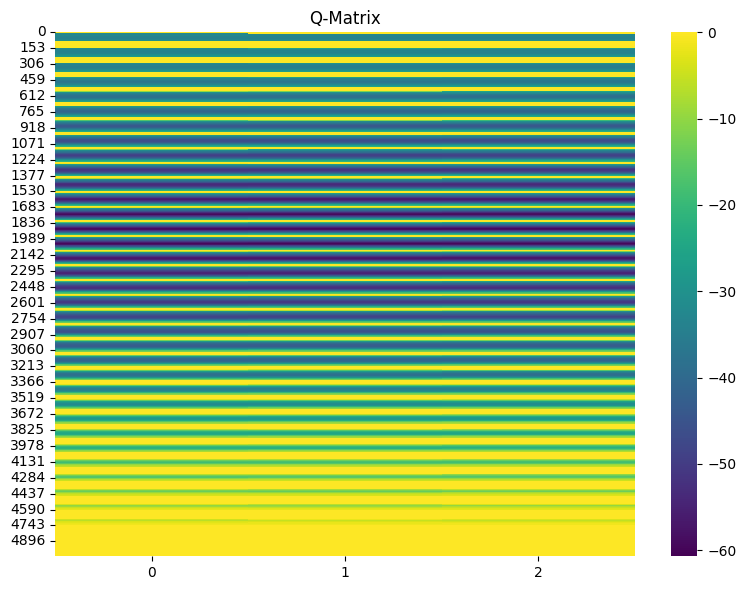

In [4]:
plt.figure(figsize=(8, 6))

# Plot the Q-value heatmap
sns.heatmap(testDyna.Q, cmap='viridis', cbar=True)

# Set title
plt.title('Q-Matrix')

# Display the plot
plt.tight_layout()
plt.show()


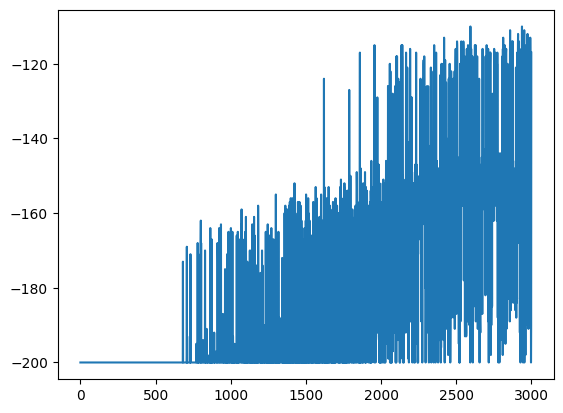

In [5]:
plt.plot(total_reward)

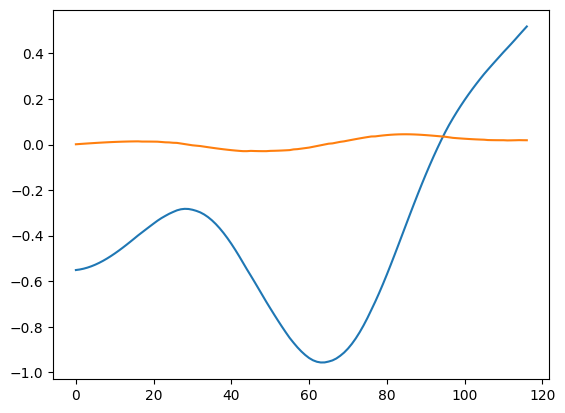

In [6]:
plt.plot(testDyna.observations)

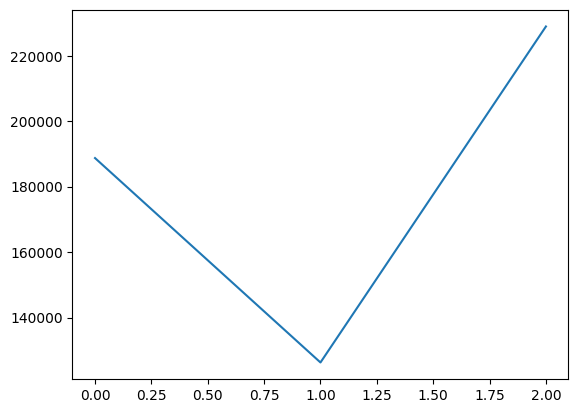

In [7]:
plt.plot(testDyna.freq_actions)

In [6]:
testDyna.freq_actions

[8059, 7410, 6999]

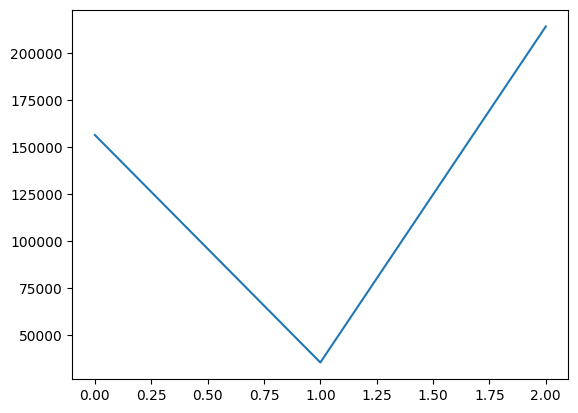

In [9]:
plt.plot(testDyna.freq_result)

In [7]:
testDyna.freq_result

[3221, 2515, 2135]